In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def quality_report(data):

    """This method will do a basic data quality report for a data frame"""
        
    if (type(data) != pd.core.frame.DataFrame):
        raise TypeError("Data must be pandas.core.frame.DataFrame")
    else: 
        columns = list(data.columns.values)
        data_type = pd.DataFrame(data.dtypes, columns=['Data type'])
        missing_data = pd.DataFrame(
        data.isnull().sum(), columns=['missing values'])
        present_data = pd.DataFrame(data.count(), columns=['present values'])
        unique_values = pd.DataFrame(columns=['unique values'])
        minimum_values = pd.DataFrame(columns=['minimum values'])
        max_values = pd.DataFrame(columns=['maximun values'])
        
        for i in columns:
            unique_values.loc[i] = [data[i].nunique()]
            try:
                minimum_values.loc[i] = [data[i].min()]
                max_values.loc[i] = [data[i].max()]
            except:
                pass
        
        DQ_report = data_type.join(missing_data).join(present_data).join(
        unique_values).join(minimum_values).join(max_values)
    
    return DQ_report

In [3]:
datasetventa = 'VENTAS2.xlsx'
venta = pd.read_excel(datasetventa)
venta.head(4)

,TIPO,PRECIO,MUNICIPIO,COLONIA
0,Departamento,6476224,Guadalajara,LADRON DE GUEVARA
1,Departamento,5390000,Zapopan,CAMINO REAL
2,Departamento,3677233,Guadalajara,JARDINES DEL BOSQUE
3,Departamento,7593583,Guadalajara,PROVIDENCIA


In [4]:
quality_report(venta)

,Data type,missing values,present values,unique values,minimum values,maximun values
TIPO,object,0,9601,2,Casa,Departamento
PRECIO,int64,0,9601,2327,255000,89000000
MUNICIPIO,object,0,9601,6,El Salto,Zapopan
COLONIA,object,0,9601,792,18 DE MARZO,ZOTOGRANDE


In [5]:
datasetrenta = 'RENTAS2.xlsx'
renta = pd.read_excel(datasetrenta)
renta.head(4)

,TIPO,PRECIO,MUNICIPIO,COLONIA
0,Departamento,7000,Guadalajara,LAS TORRES
1,Casa,15000,Tlajomulco,BOSQUE REAL DE SANTA ANITA
2,Casa,15000,Tlajomulco,BOSQUE REAL DE SANTA ANITA
3,Departamento,16500,Tlajomulco,LA RIOJA


In [6]:
quality_report(renta)

,Data type,missing values,present values,unique values,minimum values,maximun values
TIPO,object,0,1665,2,Casa,Departamento
PRECIO,int64,0,1665,247,1800,100000
MUNICIPIO,object,0,1665,6,El Salto,Zapopan
COLONIA,object,0,1665,312,AGRARIA,ZONA CENTRO


In [7]:
precioZMG = venta['PRECIO']
rentaZMG = renta['PRECIO']

In [8]:
def est(precio):
    MIN = precioZMG.min()
    MAX = precioZMG.max()
    MEAN = precioZMG.mean()
    return MIN,MAX,MEAN
    

In [9]:
est(precioZMG)

(255000, 89000000, 6368638.721487345)

In [10]:
def rent(precio):
    MIN = rentaZMG.min()
    MAX = rentaZMG.max()
    MEAN = rentaZMG.mean()
    return MIN,MAX,MEAN

In [11]:
rent(rentaZMG)

(1800, 100000, 23139.223423423424)

In [13]:
vzapopan = venta[venta['MUNICIPIO'] == 'Zapopan']
vtonala = venta[venta['MUNICIPIO'] == 'Tonalá']
vgdl = venta[venta['MUNICIPIO'] == 'Guadalajara']
vtla = venta[venta['MUNICIPIO'] == 'Tlajomulco']
vsal = venta[venta['MUNICIPIO'] == 'El Salto']
vtlaque = venta[venta['MUNICIPIO'] == 'Tlaquepaque']


In [14]:
rzapopan = renta[renta['MUNICIPIO'] == 'Zapopan']
rtonala = renta[renta['MUNICIPIO'] == 'Tonalá']
rgdl = renta[renta['MUNICIPIO'] == 'Guadalajara']
rtla = renta[renta['MUNICIPIO'] == 'Tlajomulco']
rsal = renta[renta['MUNICIPIO'] == 'El Salto']
rtlaque = renta[renta['MUNICIPIO'] == 'Tlaquepaque']

Text(0.5, 1.0, 'Precio de renta por Municipio')

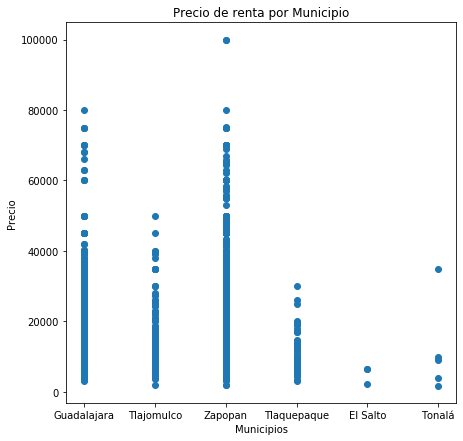

In [15]:
plt.rcParams["figure.figsize"] = (7,7)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(renta['MUNICIPIO'], renta['PRECIO'])
ax.set_xlabel('Municipios')
ax.set_ylabel('Precio')
plt.title('Precio de renta por Municipio')

Text(0.5, 1.0, 'Precio de venta por Municipio')

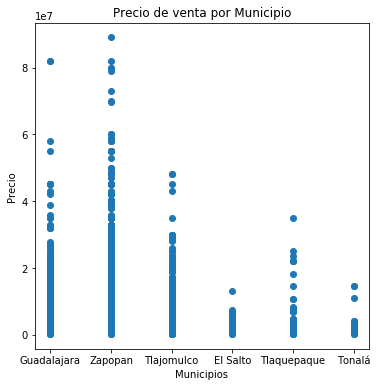

In [16]:
plt.rcParams["figure.figsize"] = (6,6)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(venta['MUNICIPIO'], venta['PRECIO'])
ax.set_xlabel('Municipios')
ax.set_ylabel('Precio')
plt.title('Precio de venta por Municipio')

Text(0, 0.5, 'COLONIA')

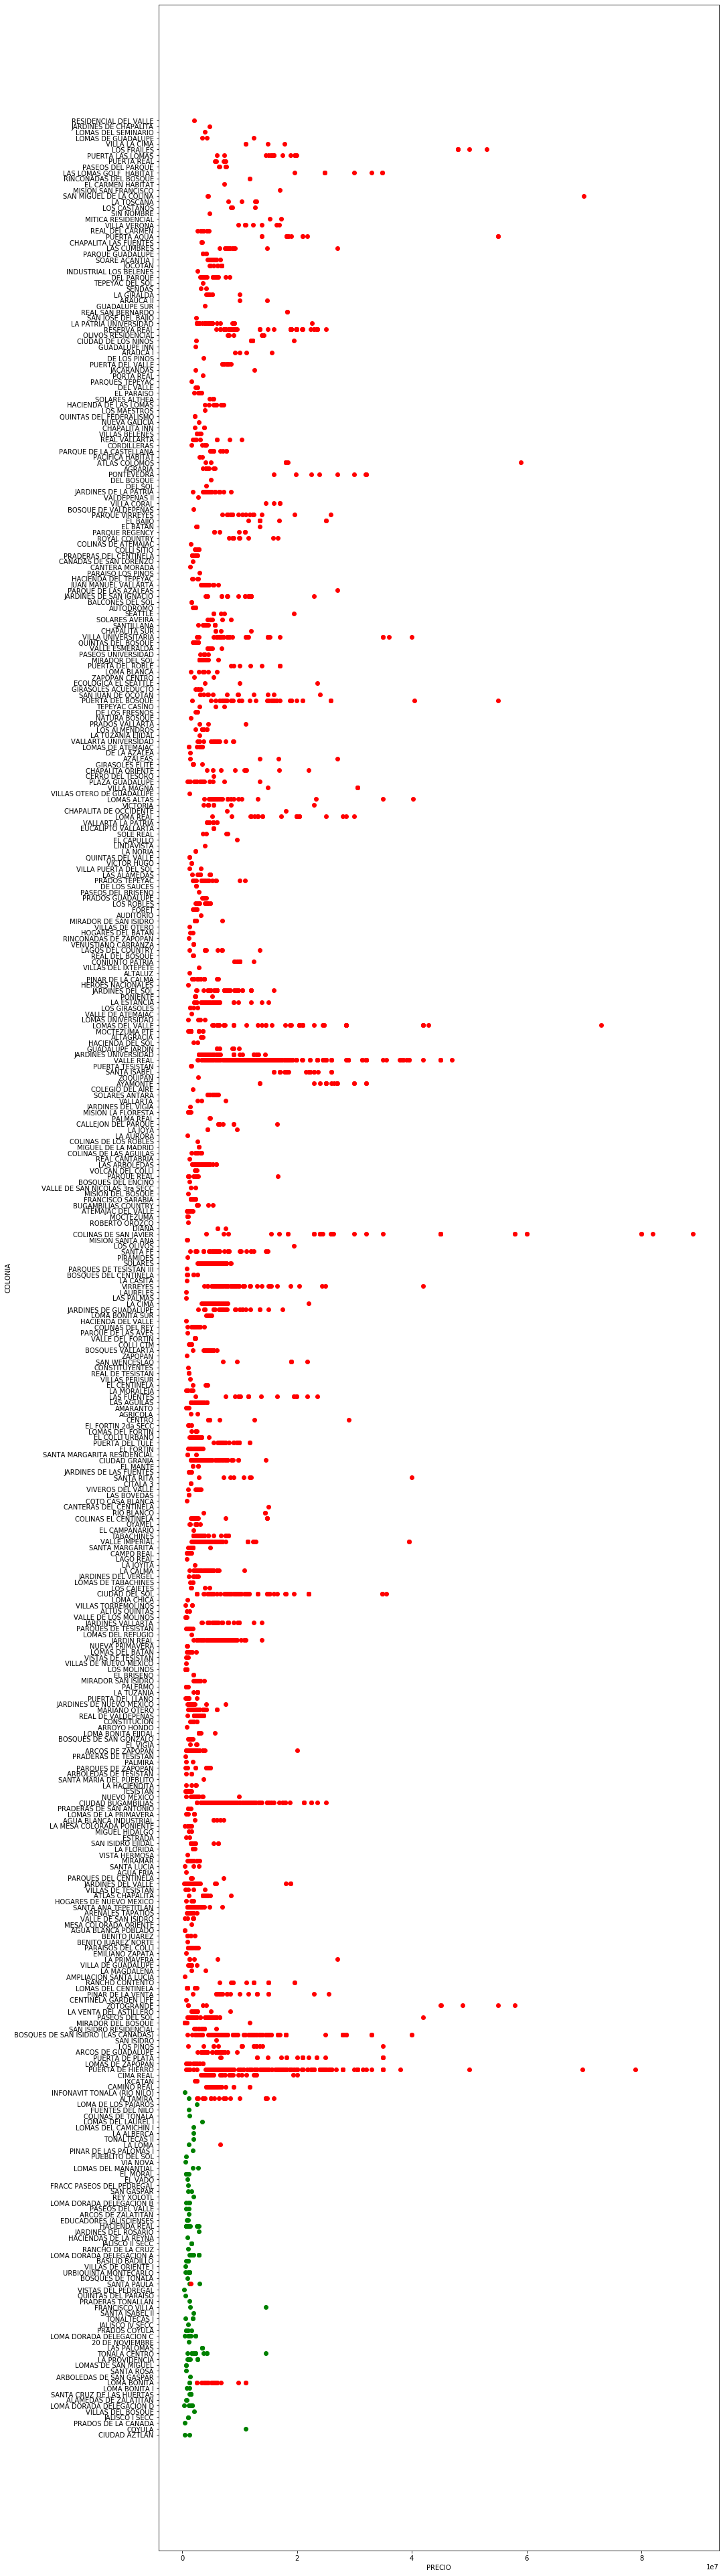

In [17]:
plt.rcParams["figure.figsize"] = (15, 70)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(vtonala['PRECIO'], vtonala['COLONIA'], color='g')

scatter_plot = ax.scatter(vzapopan['PRECIO'], vzapopan['COLONIA'], color='r')

ax.set_xlabel('PRECIO')
ax.set_ylabel('COLONIA')


Text(0, 0.5, 'COLONIA')

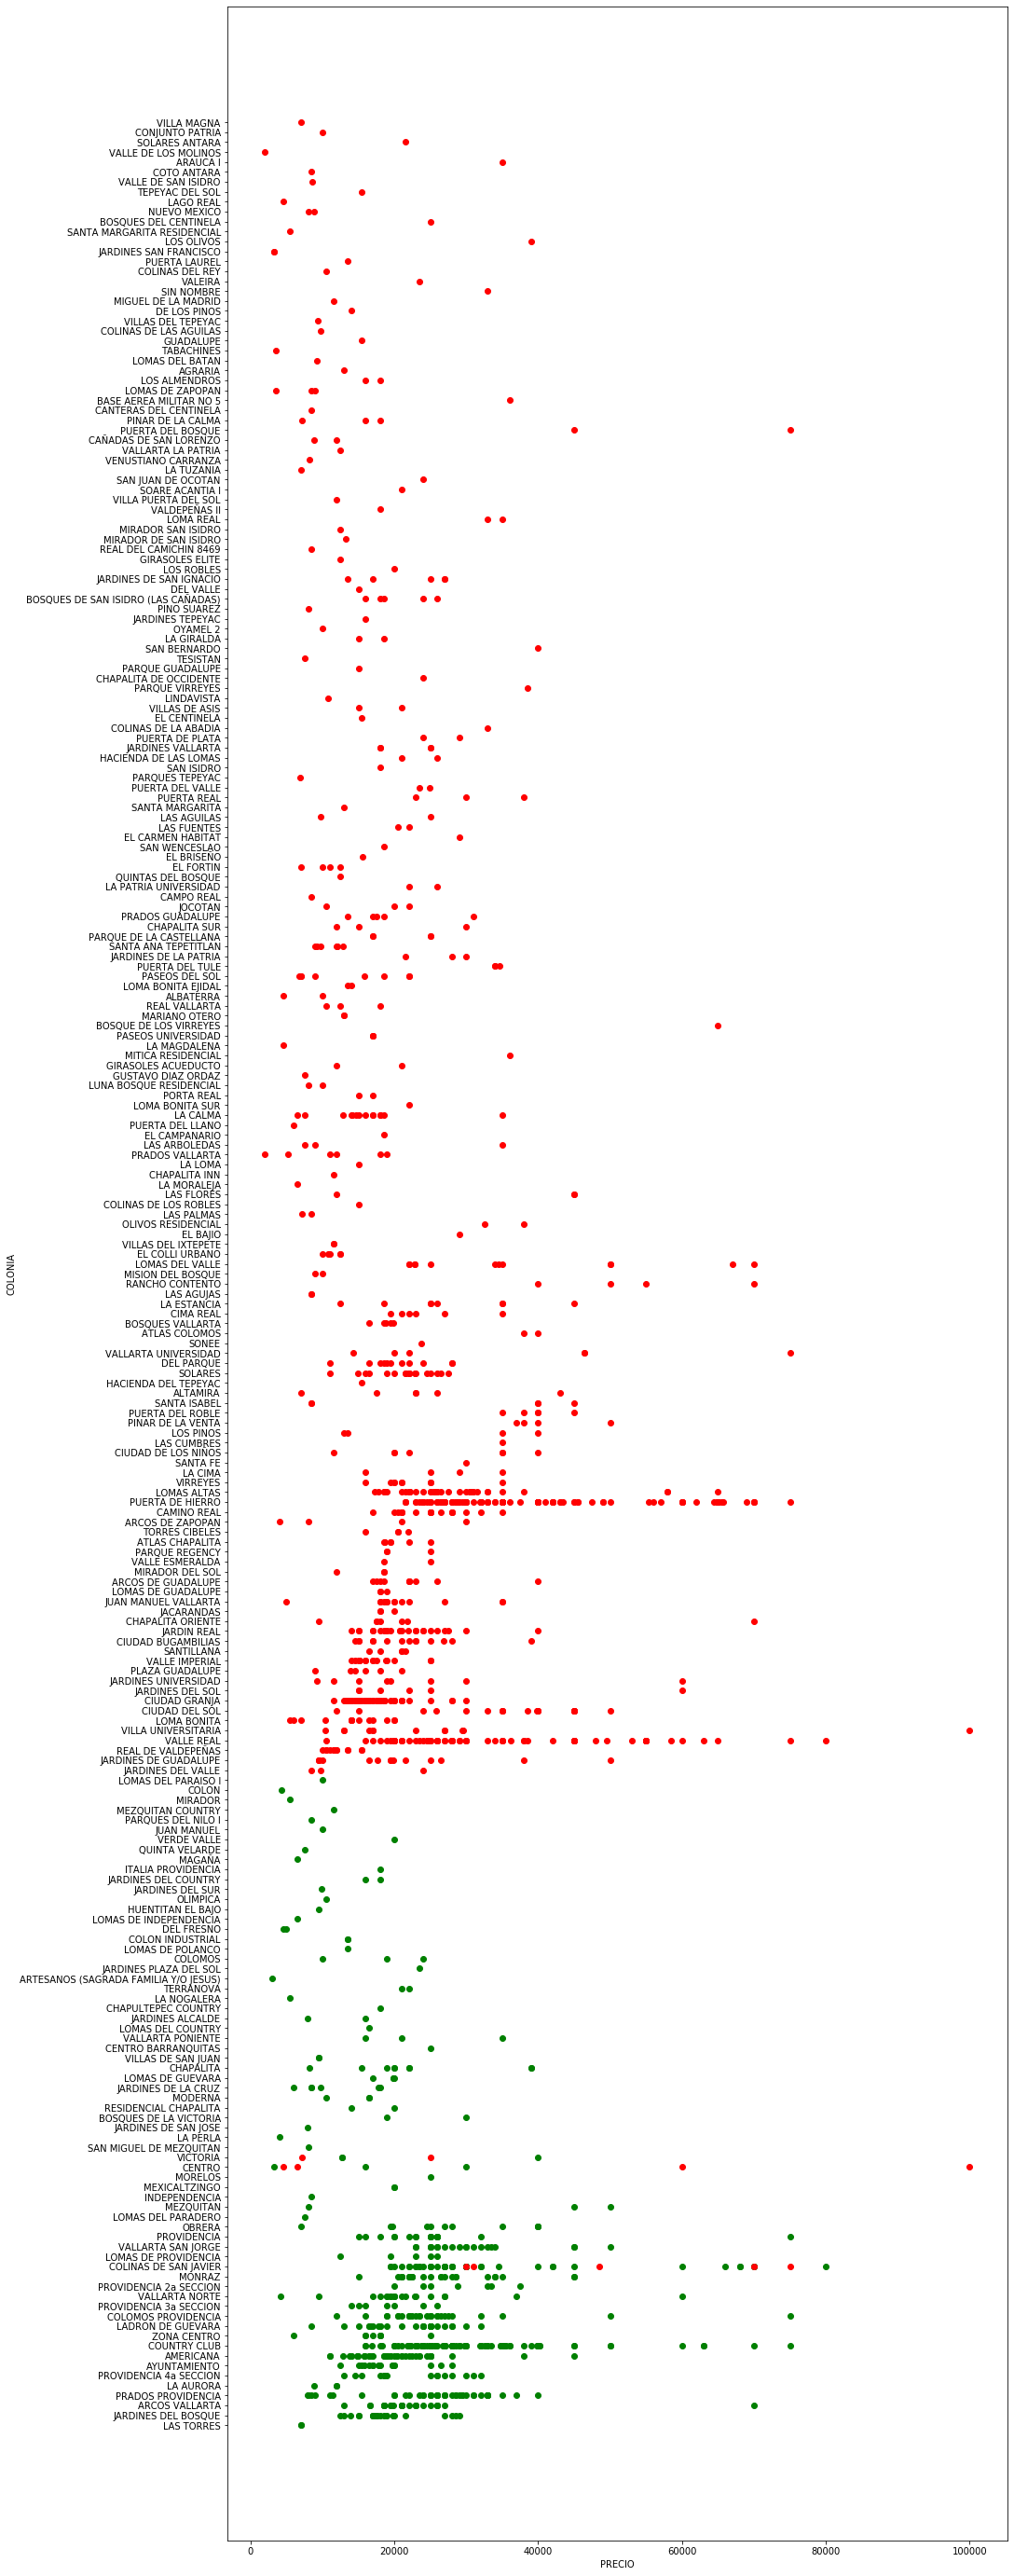

In [18]:
plt.rcParams["figure.figsize"] = (15, 50)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(rgdl['PRECIO'], rgdl['COLONIA'], color='g')

scatter_plot = ax.scatter(rzapopan['PRECIO'], rzapopan['COLONIA'], color='r')

ax.set_xlabel('PRECIO')
ax.set_ylabel('COLONIA')

In [90]:
vmun = venta['MUNICIPIO'].replace(['Zapopan','Tonalá', 'Guadalajara', 'Tlaquepaque', 'El Salto', 'Tlajomulco'], 
                 [1,2,3,4,5,6])

vmun

0       3
1       1
2       3
3       3
4       1
       ..
9596    3
9597    6
9598    1
9599    3
9600    3
Name: MUNICIPIO, Length: 9601, dtype: int64

In [84]:
from sklearn.linear_model import LinearRegression

In [93]:
venta['MUNICIPIO']

0       Guadalajara
1           Zapopan
2       Guadalajara
3       Guadalajara
4           Zapopan
           ...     
9596    Guadalajara
9597     Tlajomulco
9598        Zapopan
9599    Guadalajara
9600    Guadalajara
Name: MUNICIPIO, Length: 9601, dtype: object

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

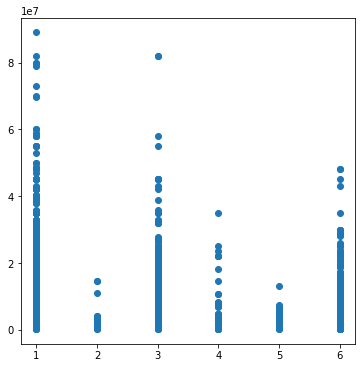

In [104]:
plt.rcParams["figure.figsize"] = (6,6)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(vmun, venta['PRECIO'])
plt.grid

In [107]:
v = venta['PRECIO'].values.reshape(-1,1)
m = vmun.values.reshape(-1,1)


In [113]:
linear_regressor = LinearRegression()
linear_regressor.fit(v,m)
v_pred = linear_regressor.predict(m)
v_pred

array([[2.52039294],
       [2.52039302],
       [2.52039294],
       ...,
       [2.52039302],
       [2.52039294],
       [2.52039294]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

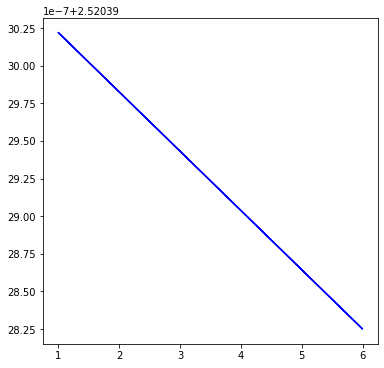

In [116]:
plt.plot(m,v_pred, color = 'b')

Text(0, 0.5, 'PRECIO')

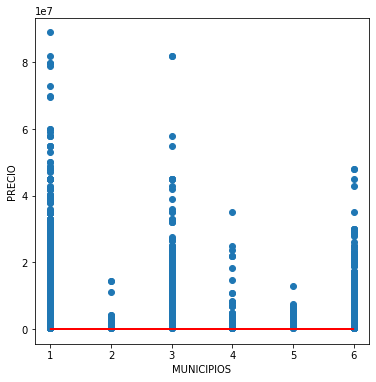

In [122]:
plt.rcParams["figure.figsize"] = (6,6)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(m,v)
plt.plot(m,v_pred, color = 'r')

plt.xlabel('MUNICIPIOS')
plt.ylabel('PRECIO')